<a href="https://colab.research.google.com/github/jumpingsphinx/ESE2030/blob/main/Neural_Network_with_Backpropagation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook demonstrates building and training a simple feedforward neural network using only NumPy for the core logic, including the backpropagation algorithm using the Fashion MNIST dataset.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Test data shape: (10000, 784)
Test labels shape: (10000, 10)
Starting training for 25 epochs...
Epoch 1/25 - Loss: 0.5851 - Accuracy: 0.8195 - Val Loss: 0.5253 - Val Accuracy: 0.8127
Epoch 2/25 - Loss: 0.4176 - Accuracy: 0.8663 - Val Loss: 0.4145 - Val Accuracy: 0.8516
Epoch 3/25 - Loss: 0.3740 - Accuracy: 0.8702 - Val Loss: 0.4008 - Val Accuracy: 0.8537
Epoch 4/25 - Loss: 0.3492 - Accuracy: 0.8817 - Val Loss: 0.3790 - Val Accuracy: 0.8598
Epoch 5/25 - Loss: 0.3299 - Accuracy: 0.8811 - Val Loss: 0.3765 - Val Accuracy: 0.8591
Epoch 6/25 - Loss: 0.3135 - Accuracy: 0.8833 - Val Loss: 0.3835 - Val Accuracy: 0.8629
Epoch 7/25 - Loss: 0.3018 - Accuracy: 0.8813 - Val Loss: 0.3839 - Val Accuracy: 0.8573
Epoch 8/25 - Loss: 0.2903 - Accuracy: 

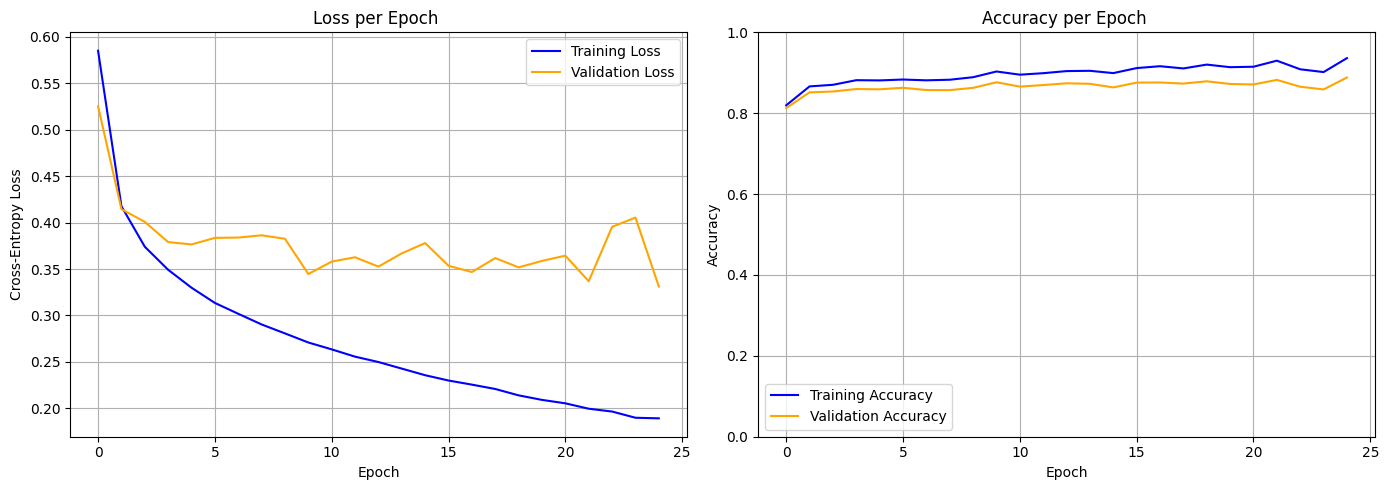

<ipython-input-1-6867823e0ef8>:410: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap


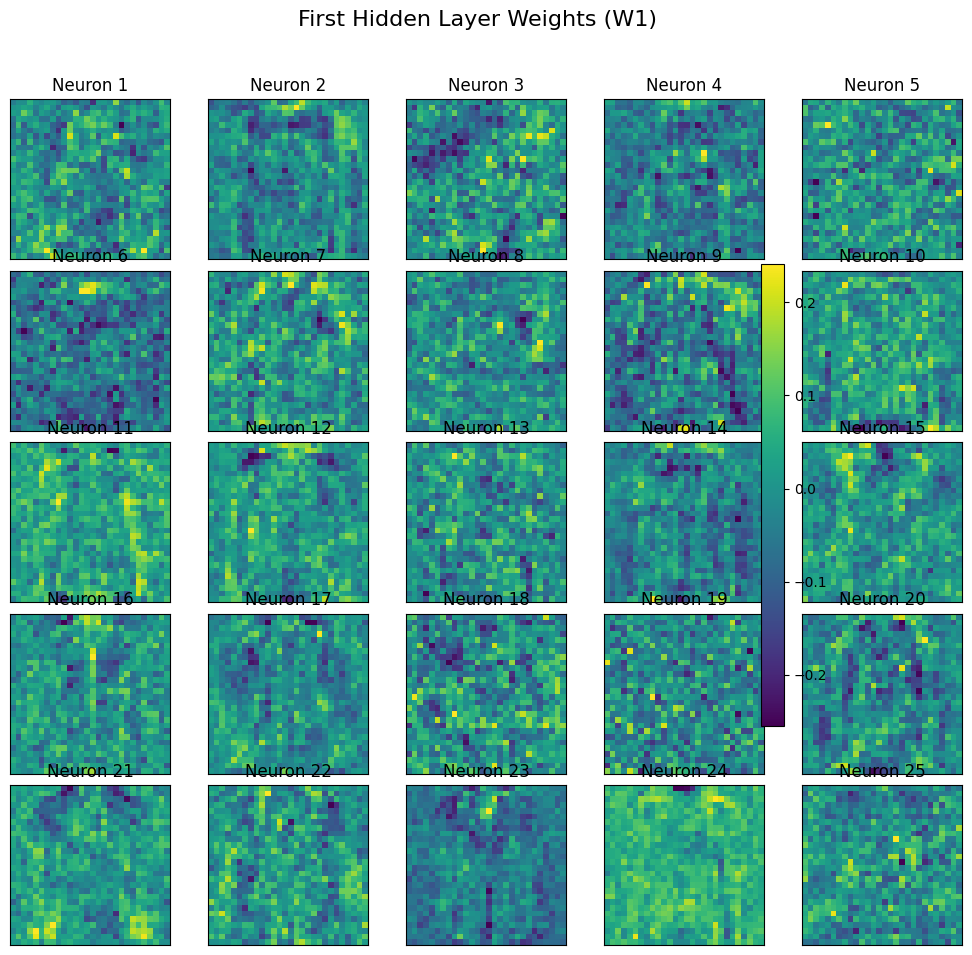


--- Training with Learning Rate: 1.0 ---
Starting training for 25 epochs...
Epoch 1/25 - Loss: 2.4440 - Accuracy: 0.1000 - Val Loss: 2.3051 - Val Accuracy: 0.1000
Epoch 2/25 - Loss: 2.3035 - Accuracy: 0.1000 - Val Loss: 2.3059 - Val Accuracy: 0.1000
Epoch 3/25 - Loss: 2.3067 - Accuracy: 0.1000 - Val Loss: 2.3054 - Val Accuracy: 0.1000
Epoch 4/25 - Loss: 2.3064 - Accuracy: 0.1000 - Val Loss: 2.3077 - Val Accuracy: 0.1000
Epoch 5/25 - Loss: 2.3063 - Accuracy: 0.1000 - Val Loss: 2.3048 - Val Accuracy: 0.1000
Epoch 6/25 - Loss: 2.3063 - Accuracy: 0.1000 - Val Loss: 2.3054 - Val Accuracy: 0.1000
Epoch 7/25 - Loss: 2.3066 - Accuracy: 0.1000 - Val Loss: 2.3095 - Val Accuracy: 0.1000
Epoch 8/25 - Loss: 2.3065 - Accuracy: 0.1000 - Val Loss: 2.3074 - Val Accuracy: 0.1000
Epoch 9/25 - Loss: 2.3063 - Accuracy: 0.1000 - Val Loss: 2.3089 - Val Accuracy: 0.1000
Epoch 10/25 - Loss: 2.3062 - Accuracy: 0.1000 - Val Loss: 2.3075 - Val Accuracy: 0.1000
Epoch 11/25 - Loss: 2.3066 - Accuracy: 0.1000 - Val 

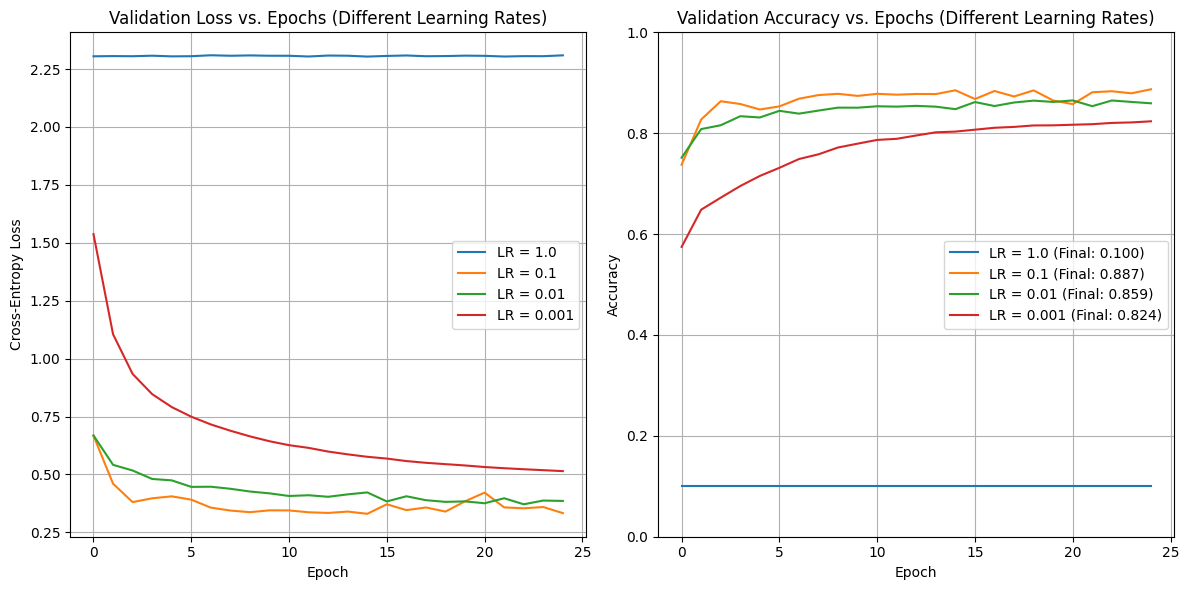

In [ ]:
"""
Neural Network with Backpropagation from Scratch on Fashion MNIST

This Colab notebook implements a simple feedforward neural network
with two hidden layers and trains it on the Fashion MNIST dataset
using backpropagation implemented from scratch.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Used only for loading the dataset easily
import time

# Load fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# --- Preprocessing ---

# Flatten images
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32')
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32')

# Normalize pixel values
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

# One-hot encode labels
num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

print(f"Training data shape: {x_train_norm.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Test data shape: {x_test_norm.shape}")
print(f"Test labels shape: {y_test_one_hot.shape}")

# Define class names for visualization later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



# Define Activation Functions and Loss
#
# We need the ReLU activation function for hidden layers, the Softmax function
# for the output layer, and the Cross-Entropy loss function. We also need their
# derivatives for backpropagation.

#
# --- Activation Functions ---

def relu(z):
    """ReLU activation function."""
    return np.maximum(0, z)

def relu_derivative(z):
    """Derivative of the ReLU function."""
    return np.where(z > 0, 1, 0)

def softmax(z):
    """Softmax activation function."""
    # Shift z by subtracting max for numerical stability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# --- Loss Function ---

def cross_entropy_loss(y_pred, y_true):
    """Cross-entropy loss function."""
    # Clip predictions to avoid log(0)
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    # Calculate loss
    m = y_true.shape[0] # Number of samples
    loss = -np.sum(y_true * np.log(y_pred)) / m
    return loss

# Implement the Neural Network Class
# This class encapsulates the network's structure, parameters, and the core
# algorithms: forward pass, backward pass, and parameter updates.
# Only two hidden layers here for simplicity's sake

#
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        """
        Initializes the network parameters (weights and biases).

        Args:
            input_size (int): Number of input features (784 for Fashion MNIST).
            hidden1_size (int): Number of neurons in the first hidden layer.
            hidden2_size (int): Number of neurons in the second hidden layer.
            output_size (int): Number of output neurons (10 for Fashion MNIST classes).
        """
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size

        # Initialize weights with small random values (He initialization scaling factor)
        # Using sqrt(2 / n_in) helps with ReLU activation
        self.W1 = np.random.randn(self.input_size, self.hidden1_size) * np.sqrt(2. / self.input_size)
        self.b1 = np.zeros((1, self.hidden1_size))
        self.W2 = np.random.randn(self.hidden1_size, self.hidden2_size) * np.sqrt(2. / self.hidden1_size)
        self.b2 = np.zeros((1, self.hidden2_size))
        self.W3 = np.random.randn(self.hidden2_size, self.output_size) * np.sqrt(1. / self.hidden2_size) # Xavier/Glorot for softmax
        self.b3 = np.zeros((1, self.output_size))

        # Cache for storing intermediate values during forward pass
        self.cache = {}

    def forward(self, X):
        """
        Performs the forward pass through the network.

        Args:
            X (np.ndarray): Input data (batch_size, input_size).

        Returns:
            np.ndarray: Output predictions (batch_size, output_size).
        """
        # Layer 1 (Hidden)
        self.cache['Z1'] = X @ self.W1 + self.b1
        self.cache['A1'] = relu(self.cache['Z1'])

        # Layer 2 (Hidden)
        self.cache['Z2'] = self.cache['A1'] @ self.W2 + self.b2
        self.cache['A2'] = relu(self.cache['Z2'])

        # Layer 3 (Output)
        self.cache['Z3'] = self.cache['A2'] @ self.W3 + self.b3
        self.cache['A3'] = softmax(self.cache['Z3']) # Output probabilities

        return self.cache['A3']

    def backward(self, X, y_true):
        """
        Performs the backward pass (backpropagation) to compute gradients.

        Args:
            X (np.ndarray): Input data (batch_size, input_size).
            y_true (np.ndarray): True labels (one-hot encoded) (batch_size, output_size).

        Returns:
            tuple: Gradients (dW1, db1, dW2, db2, dW3, db3).
        """
        m = X.shape[0] # Number of samples in the batch
        A3 = self.cache['A3'] # Output predictions from forward pass
        A2 = self.cache['A2']
        A1 = self.cache['A1']
        Z2 = self.cache['Z2']
        Z1 = self.cache['Z1']

        # --- Gradient Calculation ---

        # Output Layer (Softmax + Cross-Entropy derivative)
        # The derivative dLoss/dZ3 simplifies nicely to (A3 - y_true)
        dZ3 = (A3 - y_true) / m # Average gradient over the batch

        # Gradients for W3 and b3
        dW3 = A2.T @ dZ3
        db3 = np.sum(dZ3, axis=0, keepdims=True)

        # Hidden Layer 2
        dA2 = dZ3 @ self.W3.T
        dZ2 = dA2 * relu_derivative(Z2) # Element-wise multiplication

        # Gradients for W2 and b2
        dW2 = A1.T @ dZ2
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        # Hidden Layer 1
        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * relu_derivative(Z1) # Element-wise multiplication

        # Gradients for W1 and b1
        dW1 = X.T @ dZ1
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2, dW3, db3

    def update_params(self, grads, learning_rate):
        """
        Updates the network parameters using gradient descent.

        Args:
            grads (tuple): Gradients (dW1, db1, dW2, db2, dW3, db3).
            learning_rate (float): The learning rate for gradient descent.
        """
        dW1, db1, dW2, db2, dW3, db3 = grads

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3

    def predict(self, X):
        """
        Makes predictions on new data.

        Args:
            X (np.ndarray): Input data.

        Returns:
            np.ndarray: Predicted class indices.
        """
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

    def compute_accuracy(self, X, y_true_indices):
        """
        Computes the accuracy of the network on given data.

        Args:
            X (np.ndarray): Input data.
            y_true_indices (np.ndarray): True class indices (not one-hot).

        Returns:
            float: Accuracy score.
        """
        predictions = self.predict(X)
        return np.mean(predictions == y_true_indices)

    def train(self, X_train, y_train_one_hot, X_val, y_val_indices, epochs, batch_size, learning_rate):
        """
        Trains the neural network using mini-batch gradient descent.

        Args:
            X_train (np.ndarray): Training data.
            y_train_one_hot (np.ndarray): Training labels (one-hot).
            X_val (np.ndarray): Validation data.
            y_val_indices (np.ndarray): Validation labels (indices).
            epochs (int): Number of training epochs.
            batch_size (int): Size of mini-batches.
            learning_rate (float): Learning rate.

        Returns:
            tuple: History of loss and accuracy per epoch.
        """
        num_samples = X_train.shape[0]
        history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

        print(f"Starting training for {epochs} epochs...")
        start_time = time.time()

        for epoch in range(epochs):
            epoch_loss = 0
            # Shuffle training data
            permutation = np.random.permutation(num_samples)
            X_train_shuffled = X_train[permutation]
            y_train_shuffled = y_train_one_hot[permutation]

            for i in range(0, num_samples, batch_size):
                # Get mini-batch
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                # Forward pass
                y_pred = self.forward(X_batch)

                # Compute loss
                loss = cross_entropy_loss(y_pred, y_batch)
                epoch_loss += loss * X_batch.shape[0] # Accumulate weighted loss

                # Backward pass
                grads = self.backward(X_batch, y_batch)

                # Update parameters
                self.update_params(grads, learning_rate)

            # Calculate average loss and accuracy for the epoch
            avg_epoch_loss = epoch_loss / num_samples
            train_accuracy = self.compute_accuracy(X_train, np.argmax(y_train_one_hot, axis=1)) # Accuracy on training set

            # Evaluate on validation set
            val_pred = self.forward(X_val)
            val_loss = cross_entropy_loss(val_pred, np.eye(self.output_size)[y_val_indices]) # Use one-hot for loss calc
            val_accuracy = self.compute_accuracy(X_val, y_val_indices)

            # Store history
            history['loss'].append(avg_epoch_loss)
            history['accuracy'].append(train_accuracy)
            history['val_loss'].append(val_loss)
            history['val_accuracy'].append(val_accuracy)

            print(f"Epoch {epoch+1}/{epochs} - "
                  f"Loss: {avg_epoch_loss:.4f} - "
                  f"Accuracy: {train_accuracy:.4f} - "
                  f"Val Loss: {val_loss:.4f} - "
                  f"Val Accuracy: {val_accuracy:.4f}")

        end_time = time.time()
        print(f"\nTraining finished in {end_time - start_time:.2f} seconds.")
        return history


# Initialize and Train the Network

# --- Network Configuration ---
INPUT_SIZE = x_train_norm.shape[1]  # 784
HIDDEN1_SIZE = 128
HIDDEN2_SIZE = 64
OUTPUT_SIZE = num_classes          # 10

# --- Training Hyperparameters ---
EPOCHS = 25
BATCH_SIZE = 64
LEARNING_RATE = 0.1 # We will experiment with this later

# --- Initialize the Network ---
nn = NeuralNetwork(INPUT_SIZE, HIDDEN1_SIZE, HIDDEN2_SIZE, OUTPUT_SIZE)

# --- Train the Network ---
# Using the test set as validation for simplicity in this example
# A separate validation split from training data is generally better practice
history = nn.train(x_train_norm, y_train_one_hot, x_test_norm, y_test,
                   epochs=EPOCHS, batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE)

# Plot the loss and accuracy curves over epochs for both training and validation sets.

#
def plot_history(history, title_suffix=''):
    """Plots the training and validation loss and accuracy."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Loss
    axes[0].plot(history['loss'], label='Training Loss', color='blue')
    axes[0].plot(history['val_loss'], label='Validation Loss', color='orange')
    axes[0].set_title(f'Loss per Epoch {title_suffix}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Cross-Entropy Loss')
    axes[0].legend()
    axes[0].grid(True)

    # Plot Accuracy
    axes[1].plot(history['accuracy'], label='Training Accuracy', color='blue')
    axes[1].plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
    axes[1].set_title(f'Accuracy per Epoch {title_suffix}')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].set_ylim(0, 1) # Accuracy ranges from 0 to 1

    plt.tight_layout()
    plt.show()

# Plot the results from the initial training
plot_history(history)

# We can visualize the weights connecting the input layer to the first hidden
# layer. Each column in the `W1` matrix corresponds to a neuron in the first
# hidden layer. Reshaping each column back into a 28x28 image can give us some
# insight into the features the network learns to detect in the initial layer.

#
def visualize_weights(weights, num_neurons_to_show=25):
    """Visualizes the weights of the first hidden layer."""
    # Weights shape: (input_size, hidden1_size)
    num_neurons = weights.shape[1]
    num_to_show = min(num_neurons_to_show, num_neurons)
    num_cols = int(np.ceil(np.sqrt(num_to_show)))
    num_rows = int(np.ceil(num_to_show / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()

    for i in range(num_to_show):
        # Get the weights for the i-th neuron and reshape to 28x28
        neuron_weights = weights[:, i].reshape(28, 28)

        ax = axes[i]
        im = ax.imshow(neuron_weights, cmap='viridis') # Use a perceptually uniform colormap
        ax.set_title(f'Neuron {i+1}')
        ax.set_xticks([])
        ax.set_yticks([])

    # Hide any unused subplots
    for j in range(num_to_show, len(axes)):
        axes[j].axis('off')

    fig.colorbar(im, ax=axes[:num_to_show], shrink=0.6)
    plt.suptitle('First Hidden Layer Weights (W1)', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# Visualize the weights learned by the trained network
visualize_weights(nn.W1, num_neurons_to_show=25) # Show weights for first 25 neurons


# Training the network with different learning rates and comparing
# their training dynamics (loss and accuracy curves).

# %%
# --- Experiment Setup ---
learning_rates_to_test = [1.0, 0.1, 0.01, 0.001]
histories_lr = {}
final_accuracies_lr = {}

# --- Run Experiments ---
for lr in learning_rates_to_test:
    print(f"\n--- Training with Learning Rate: {lr} ---")
    # Create a new network instance for each experiment
    nn_exp = NeuralNetwork(INPUT_SIZE, HIDDEN1_SIZE, HIDDEN2_SIZE, OUTPUT_SIZE)
    history_lr = nn_exp.train(x_train_norm, y_train_one_hot, x_test_norm, y_test,
                              epochs=EPOCHS, batch_size=BATCH_SIZE, learning_rate=lr)
    histories_lr[lr] = history_lr
    final_accuracies_lr[lr] = history_lr['val_accuracy'][-1] # Get final validation accuracy
    print(f"Final Validation Accuracy for LR={lr}: {final_accuracies_lr[lr]:.4f}")

# Plotting results
plt.figure(figsize=(12, 6))

# Plot Validation Loss for different learning rates
plt.subplot(1, 2, 1)
for lr, history in histories_lr.items():
    plt.plot(history['val_loss'], label=f'LR = {lr}')
plt.title('Validation Loss vs. Epochs (Different Learning Rates)')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.grid(True)
# plt.ylim(0, 2.5) # Optional: Set y-limit for better comparison if needed

# Plot Validation Accuracy for different learning rates
plt.subplot(1, 2, 2)
for lr, history in histories_lr.items():
    plt.plot(history['val_accuracy'], label=f'LR = {lr} (Final: {final_accuracies_lr[lr]:.3f})')
plt.title('Validation Accuracy vs. Epochs (Different Learning Rates)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0, 1) # Accuracy is between 0 and 1

plt.tight_layout()
plt.show()

##Same class, but with regular mnist instead of fashion mnist

MNIST Training data shape: (60000, 784)
MNIST Training labels shape: (60000, 10)

--- Training on MNIST with Learning Rate: 1.0 ---
Starting training for 25 epochs...
Epoch 1/25 - Loss: 1.0115 - Accuracy: 0.8429 - Val Loss: 0.5195 - Val Accuracy: 0.8451
Epoch 2/25 - Loss: 0.4237 - Accuracy: 0.9193 - Val Loss: 0.3092 - Val Accuracy: 0.9169
Epoch 3/25 - Loss: 0.3086 - Accuracy: 0.9074 - Val Loss: 0.3481 - Val Accuracy: 0.9008
Epoch 4/25 - Loss: 0.2753 - Accuracy: 0.9356 - Val Loss: 0.2639 - Val Accuracy: 0.9307
Epoch 5/25 - Loss: 0.2360 - Accuracy: 0.9459 - Val Loss: 0.2385 - Val Accuracy: 0.9406
Epoch 6/25 - Loss: 0.2121 - Accuracy: 0.9469 - Val Loss: 0.2230 - Val Accuracy: 0.9408
Epoch 7/25 - Loss: 0.2038 - Accuracy: 0.9328 - Val Loss: 0.2975 - Val Accuracy: 0.9233
Epoch 8/25 - Loss: 0.1822 - Accuracy: 0.9622 - Val Loss: 0.1794 - Val Accuracy: 0.9531
Epoch 9/25 - Loss: 0.1619 - Accuracy: 0.9529 - Val Loss: 0.2468 - Val Accuracy: 0.9436
Epoch 10/25 - Loss: 0.1496 - Accuracy: 0.9609 - Va

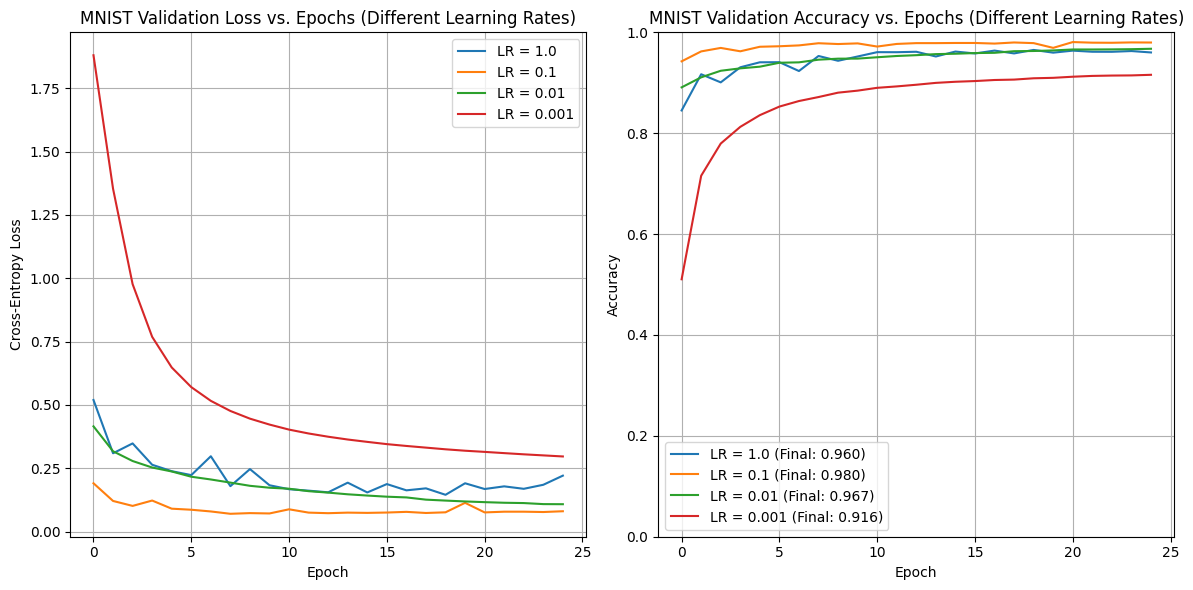

In [ ]:
# --- Load MNIST Dataset ---
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# --- Preprocessing ---
x_train_flat_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], -1).astype('float32')
x_test_flat_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], -1).astype('float32')

x_train_norm_mnist = x_train_flat_mnist / 255.0
x_test_norm_mnist = x_test_flat_mnist / 255.0

y_train_one_hot_mnist = np.eye(num_classes)[y_train_mnist]
y_test_one_hot_mnist = np.eye(num_classes)[y_test_mnist]

print(f"MNIST Training data shape: {x_train_norm_mnist.shape}")
print(f"MNIST Training labels shape: {y_train_one_hot_mnist.shape}")

# --- Experiment Setup ---
learning_rates_to_test_mnist = [1.0, 0.1, 0.01, 0.001]
histories_lr_mnist = {}
final_accuracies_lr_mnist = {}

# --- Run Experiments ---
for lr in learning_rates_to_test_mnist:
    print(f"\n--- Training on MNIST with Learning Rate: {lr} ---")
    nn_mnist_exp = NeuralNetwork(INPUT_SIZE, HIDDEN1_SIZE, HIDDEN2_SIZE, OUTPUT_SIZE)
    history_lr_mnist = nn_mnist_exp.train(
        x_train_norm_mnist, y_train_one_hot_mnist,
        x_test_norm_mnist, y_test_mnist,
        epochs=EPOCHS, batch_size=BATCH_SIZE, learning_rate=lr
    )
    histories_lr_mnist[lr] = history_lr_mnist
    final_accuracies_lr_mnist[lr] = history_lr_mnist['val_accuracy'][-1]
    print(f"Final Validation Accuracy for MNIST LR={lr}: {final_accuracies_lr_mnist[lr]:.4f}")

# --- Plot Results ---
plt.figure(figsize=(12, 6))

# Validation Loss
plt.subplot(1, 2, 1)
for lr, history in histories_lr_mnist.items():
    plt.plot(history['val_loss'], label=f'LR = {lr}')
plt.title('MNIST Validation Loss vs. Epochs (Different Learning Rates)')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.grid(True)

# Validation Accuracy
plt.subplot(1, 2, 2)
for lr, history in histories_lr_mnist.items():
    plt.plot(history['val_accuracy'], label=f'LR = {lr} (Final: {final_accuracies_lr_mnist[lr]:.3f})')
plt.title('MNIST Validation Accuracy vs. Epochs (Different Learning Rates)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

## As we can see, the learning rate parameter pretty obviously determines how quickly the algorithms converge, Interestingly, the loss of the learning rate parameter at 0.001 was significantly higher than that of higher learning rates. The learning rate of 1 ended up having significant jumps in its performance on the validation dataset, which makes sense as it ends up "bouncing" around the minima in the hyperplane as opposed to lower learning rates which will converge slower but more stably. Therefore, they lead to lower loss.